### Assignment1

Remember -> submission using itslearning, both notebook and github repo *deadline on 22.11.2021*

#### Task 1 (3 points):

Regression $\to$ Superconductivity Data Set

The goal here is to predict the critical temperature based on the features extracted.

https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

* Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained score as a function of the chosen parameter. Plot the coefficient magnitudes for the best model. 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

plt.rcParams["figure.figsize"] = [16, 9]

# Load dataset
url = "https://people.arcada.fi/~martinel/"
df = pd.read_csv(url + 'train.csv')

# Separate dependent and independent variables
X = df.drop('critical_temp',axis=1)
y = df['critical_temp']

# Print shape
print(df.shape)

(21263, 82)


In [2]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [3]:
# Fit two regression models to predict the critical temperature. Report the score with the default parameters of each model
ridge_reg = Ridge().fit(X_train, y_train)    
lasso_reg = Lasso(max_iter=100000).fit(X_train, y_train)

print("Ridge regression:")
print("Training set score: {:.2f}".format(ridge_reg.score(X_train, y_train)))
print("Test set score: {:.2f}\n".format(ridge_reg.score(X_test, y_test)))

print("Lasso regression:")
print("Training set score: {:.2f}".format(lasso_reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_reg.score(X_test, y_test)))

Ridge regression:
Training set score: 0.74
Test set score: 0.73

Lasso regression:
Training set score: 0.72
Test set score: 0.70


In [14]:
# Perform a simple manual optimization for one of the default parameters (at least 5 different values) 
alphas = [0.01, 0.1, 1, 10, 50, 75]
models = ["Ridge Train", "Ridge Test", "Lasso Train", "Lasso Test"]

ridge_score_train = []
ridge_score_test = []
lasso_score_train = []
lasso_score_test = []

r2_dataset = pd.DataFrame()
r2_dataset["Model"] = models

for alpha in alphas:
    
    ridge_reg = Ridge(alpha=alpha).fit(X_train, y_train)    
    lasso_reg = Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    
    ridge_score_train.append(ridge_reg.score(X_train, y_train))
    ridge_score_test.append(ridge_reg.score(X_test, y_test))
    
    lasso_score_train.append(lasso_reg.score(X_train, y_train))
    lasso_score_test.append(lasso_reg.score(X_test, y_test))

    r2_dataset[f"alpha={alpha}"] = [
        ridge_reg.score(X_train, y_train),
        ridge_reg.score(X_test, y_test),      
        lasso_reg.score(X_train, y_train), 
        lasso_reg.score(X_test, y_test) 
                            ]

r2_dataset

Model         Lasso Test
alpha=0.01      0.726089
alpha=0.1       0.716065
alpha=1         0.704168
alpha=10         0.65914
alpha=50        0.598107
alpha=75        0.588462
dtype: object

In [17]:
r2_dataset

,Model,alpha=0.01,alpha=0.1,alpha=1,alpha=10,alpha=50,alpha=75
0,Ridge Train,0.740407,0.740392,0.740149,0.738202,0.735236,0.734425
1,Ridge Test,0.728125,0.727983,0.727416,0.725297,0.722156,0.721242
2,Lasso Train,0.738410,0.729641,0.718610,0.675204,0.610045,0.600023
3,Lasso Test,0.726089,0.716065,0.704168,0.659140,0.598107,0.588462


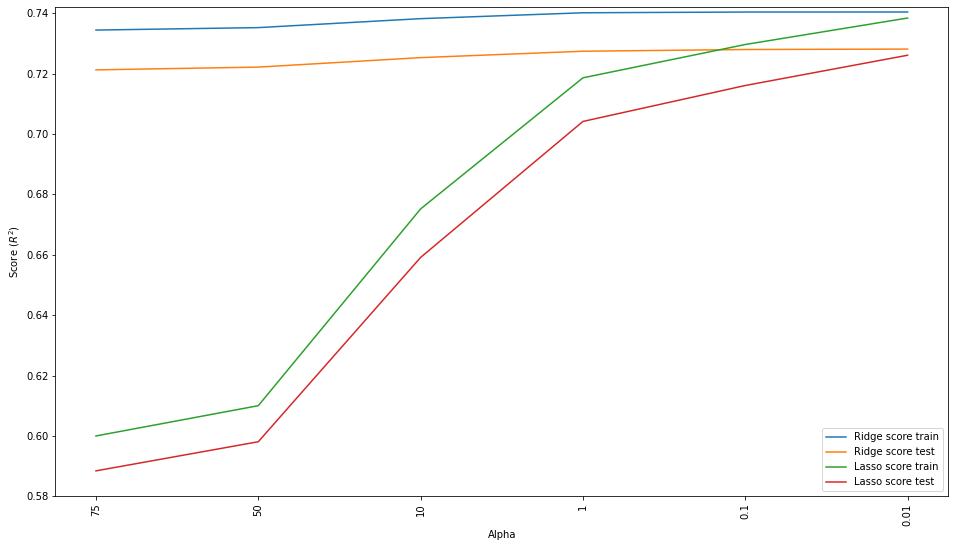

In [18]:
# Plot the new obtained score as a function of the chosen parameter
def plot_score():
    # plt.plot(neighbors_settings, training_accuracy, label="training")
    plt.plot(ridge_score_train, label="Ridge score train")
    plt.plot(ridge_score_test, label="Ridge score test")
    plt.plot(lasso_score_train, label="Lasso score train")
    plt.plot(lasso_score_test, label="Lasso score test")
    plt.ylabel("Score ($R^2$)")
    plt.xlabel("Alpha")
    plt.ylim([0.580,0.742])
    plt.xticks(range(len(alphas)), alphas, rotation=90)
    plt.gca().invert_xaxis()
    plt.legend()

plot_score()

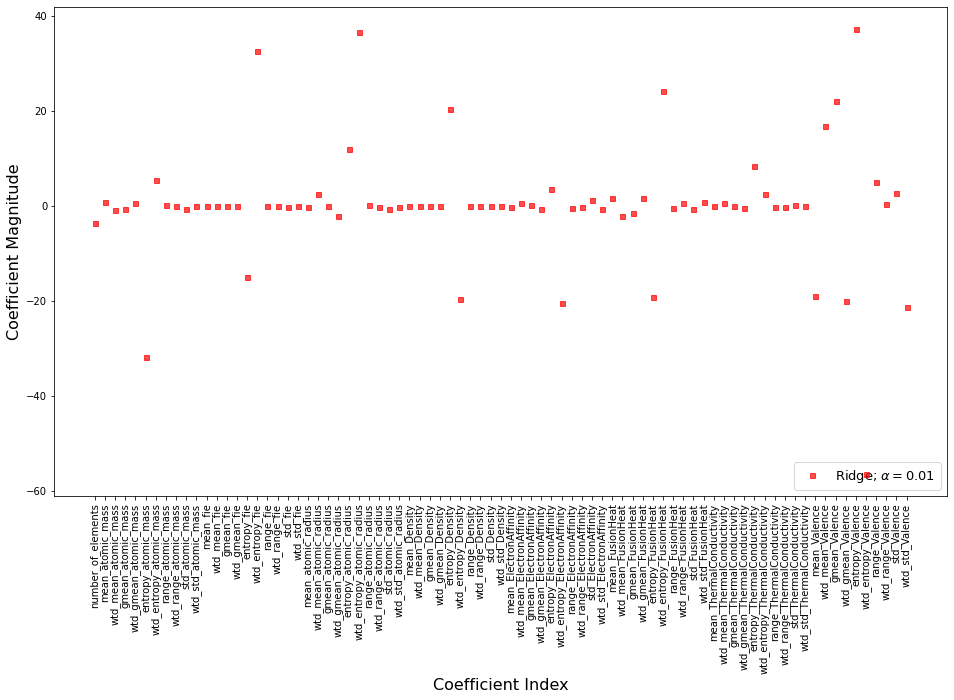

In [25]:
# Plot the coefficient magnitudes for the best model (Ridge - alpha 0.01)
names = list(X.columns)
plt.plot(ridge_reg.coef_,alpha=0.7,linestyle='none',marker='s',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.xticks(range(len(names)), names, rotation=90)
plt.legend(fontsize=13,loc=4)
plt.show()

#### Task 2 (3 points):

Binary classification $\to$ Default of credit card clients Data Set

The goal here is to predict the default payment next month.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

* Fit two binary classification models to predict the client's credit card default. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) and plot the new obtained accuracy as a function of the chosen parameter.. Plot the feature importance. 

In [ ]:
# Load dataset
url = "https://people.arcada.fi/~martinel/"
df = pd.read_excel(url + 'default of credit card clients.xls')

df.head
# Separate dependent and independent variables
# X = df.drop('critical_temp',axis=1)
# y = df['critical_temp']

# Print shape
# print(df.shape)

#### Task 3 (9 points): 

Multiclass & binary classification $\to$ Drug consumption (quantified) Data Set

https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Data Set Information:

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

* Fit two multiclass classification models to predict two selected features out of 18. Use numerical values to represent each class. Report accuracy with the default parameters of each model.
* Perform a simple manual optimization for one of the default parameters (at least 5 different values) for one of the previous models. Plot the new obtained accuracy as a function of the chosen parameter. 
* Fit one multiclass classification model for all the rest 16 features. Comment on the accuracy of predicting each feature, for all the seven classes. 
* Run one binary classification model for 3 features out of 18. Test the performance of the model by choosing as:
 - one class (class 0) the variable "Used in Last Decade" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade" and "Used in Last Year" and the remaining variables for the other class (class 1).
 - one class (class 0) the variables "Used in Last Decade", "Used in Last Year", "Used in Last Month" and the remaining variables for the other class (class 1).
 
 Comment your results, and point which selection of classes have better accuracy.